
GABRIELA VEGA
BCSAI
MACHINE LEARNING ASSIGNMENT 1


Installing my libraries


In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Downloading and Importing the Dataset

In [2]:
import kagglehub

# Downloading dataset
path = kagglehub.dataset_download("vinicius150987/titanic3")

print("Path to dataset files:", path)

/Users/gabyvega/ExpenseManagement/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/gabyvega/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1


TASK 1

Initially exploring the data



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading our dataset
file_path = "titanic3.xls"
df = pd.read_excel(file_path)

df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# checking dataset shape (number of rows and columns)
print(f"dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# checking column names and data types
print("\ncolumn names and data types:")
print(df.dtypes)

# Check for missing values
print("\nmissing values:")
print(df.isnull().sum())


dataset contains 1309 rows and 14 columns

column names and data types:
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

missing values:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Explanation for the following section of Code:

The next section of code is essentially summarizing numerical and categorical data. I used "df.describe" to find descriptive statistics (count, mean, std, etc.) and then did the same but for the categorical variables. From these summary statistics we can draw some data that will be relevant to our model like the fact that most passengers were in the third clas and that there were more males than females. We also identified the number of missing values in the dataset. As we can see in the chart, "age", "fare", "cabin", "embarked", "boat" "body" and " home dest" are all columns with missing values which we will have to deal with in task 2.  

In [5]:
# Summary stats for columns with numerical values
df.describe()



,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:

# summary stats of categorical variables
df.describe(include=['object'])


,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


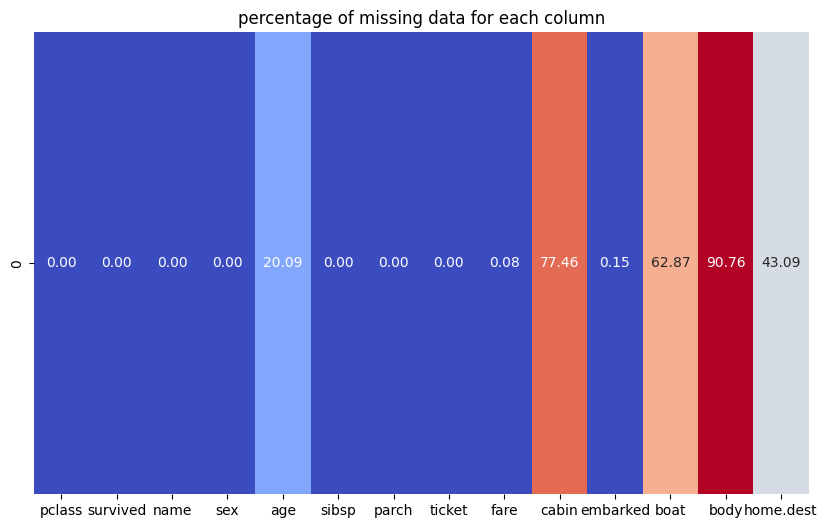

In [7]:
# visualizing missing data by percentage
plt.figure(figsize=(10,6))
missing_data = df.isnull().mean().to_frame().T * 100  # Convert to percentage
sns.heatmap(missing_data, annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title("percentage of missing data for each column")
plt.show()




Explanation for the following section of Code:

For this next part we are creating a visualization of the survival distribution and numerical features. For the survivor distribution, I created a bar plot that shows how many passengers survived (1) and how many died (0). From this plot we can see that this distribution is unbalanced with a around 800 passengers dying and only around 500 surviving. We will take note of this for a later task where we will have to deal with the unbalanced nature of the dataset. One the other hand, the distribution of numerical features, is a way to understand trends that may go on to affect the decesions we will make later. From the historgrams we now know that class will be a predictor for survival since it is not evenly distributed (we also intuitively know that class will be relevant in this context due to general discrimination and biases). We also find that most passengers were between the ages of 20-30 (there is a right skew) and most passengers travelled alone. Finally, we can note that some passengers paid very high fares with this distribution being very skewed.

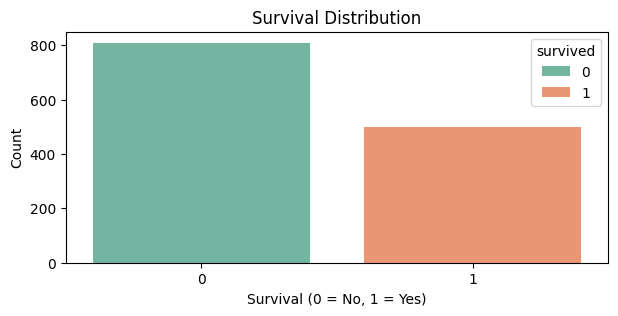

In [8]:
# Visualizing survivors
plt.figure(figsize=(7,3))
sns.countplot(data=df, x="survived", hue="survived", palette="Set2")  # Added hue="survived"
plt.title("Survival Distribution")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


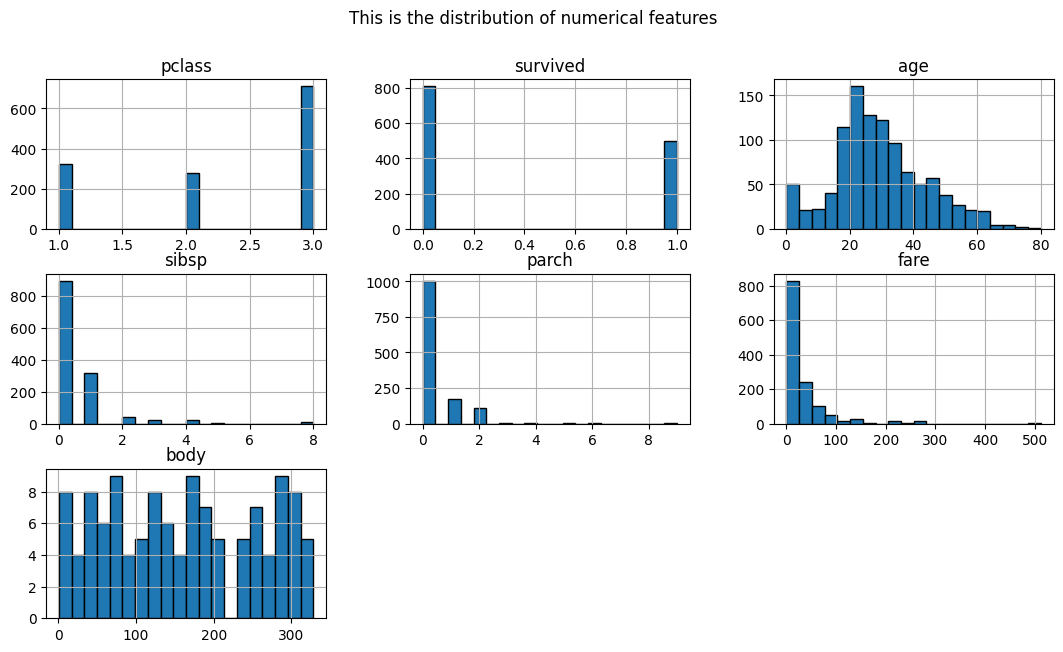

In [9]:
# numerical features as histograms
df.hist(figsize=(13,7), bins=20, edgecolor="black")
plt.suptitle("This is the distribution of numerical features")
plt.show()


Explanation for the following section of Code:

In this final section for Task 1 we are visualizing the categorical features "sex", "class" and "embarking". I created a bar chart for each variable that displays distribution of each one. For "sex", we can see that as we noted before, there are more males than females. From this we know that gender may play a role in survival. For class we can see that as I explained above, this category is very unbalanced with third class being the largest, again implying that class may be an important factor when predicting survival. Finally the third plot shows from where the passengers embarked. This category is one that has many missing values that we will need to handle in our next step.

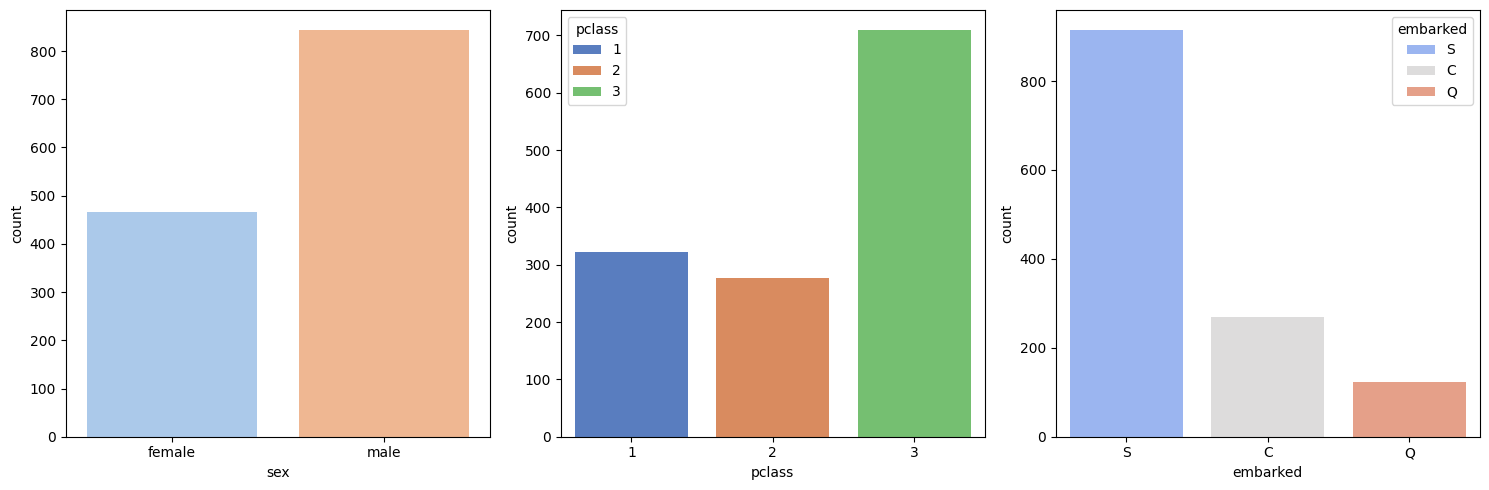

In [10]:
# plots for categorical features ( sex, class and embarking)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df, x="sex", ax=axes[0], hue="sex", palette="pastel")
sns.countplot(data=df, x="pclass", ax=axes[1], hue="pclass", palette="muted")
sns.countplot(data=df, x="embarked", ax=axes[2], hue="embarked", palette="coolwarm")

plt.tight_layout()
plt.show()


Observations

We have done our initial exploration of the data of both our numerical and categorical values. We will now go onto the second task which is taking care of the missing values. The columns that contain the most missing variables are cabin, boat and body so these are the ones we will take a closer look at.



TASK 2

Managing Missing Variables

Explanation for the following section of Code:

I am using df.isnull as well as a percentage to find the missing values in each category. I am then using pd.dataframe to display this data in a table in order to understand it better. Finally, I am filtering out categories that do not have missing values as these are not relevant in what we are currently doing.

In [11]:
# checking for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# creating DataFrame to display missing value info
missing_data = pd.DataFrame({
    'missing values': missing_values,
    'percentages': missing_percent
})

# displaying only columns with missing values
missing_data = missing_data[missing_data["missing values"] > 0]
missing_data


,missing values,percentages
age,263,20.091673
fare,1,0.076394
cabin,1014,77.463713
embarked,2,0.152788
boat,823,62.872422
body,1188,90.756303
home.dest,564,43.086325


Explanation for the following section of Code:

I decided to drop "cabin", "boat", and "body" from the dataset because these columns all have a very high precentage of missing data ("77%", "62%" and "90%" respectively). For "caabin", since such a high precentage of values were missing I thought it would be best to drop it since using it through feature engineering would likely lead to unreliable results anyway. The "boat" category only takes record of the the lifeboat numbers which were recorded only for survivors so using this for our prediction does not make sense since our model would ony be learning that people that have a recorded boat number survived, which has not use in what we our actually trying to predict. Similarly, the "body" column is recording the identification numbers of the passengers that died, something that is not relevant in for our model. I dropped home destination because it did have a high precentage of 43% but more importantly it is also not relevant for our actual prediction model.

I also dropped name and ticket since we know these values will not be important in deciding survival.

In [12]:
# decided to drop "'cabin'", "'boat'", and "'body'" since over 60% of their values are missing
df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace=True, errors="ignore")

# dropped name and ticket since they are not important in ssurvival prediction
df.drop(columns=['name', 'ticket'], inplace=True, errors="ignore")



Explanation for the following section of Code:

Below we are handling the missing values in the "age" and "fare" categories. I decided to use imputation and replace the missing values with the median of their respective cateogires. These categories has a lower amount of missing data so dropping these columns was not an option as it would be losing a significant amount of data. For both these categories I chose to use the median value because using this is prefered in cases where the data is skewed (which both age and fare are) as it is more resistant to outliers. By replacing these values we will not significantly affect the prediction.

In [13]:
# filling in missing values in 'Age' and 'Fare' with the median
df = df.fillna({'age': df['age'].median(), 'fare': df['fare'].median()})


Explanation for the following section of Code:

I decided to hanlde the missing values in the "embarked" category by replacing them with the mode (value seen most often). Since embarked is a categorical value it did not make sense to use the median or mean so I thought the best approach was to use the values that were repeated the most. For this category only 2 values were missing meaning that replacing these with the port used the most is reasonable.   

In [14]:
# filling missing values in "'embarked'" with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [15]:
# checking there are no missing values left
print("Missing values after handling:")
print(df.isnull().sum().sum())  


Missing values after handling:
0


TASK 5

Data Splitting

Explanation for the following section of Code:

In this next step we are splitting our dataset into training data and then into testing and validation sets. X_train is for training, X_val for validation and X_test for testing. The X variable we define at the beginning contains all features except for survived (since this is what we are trying to predict) while Y only contains the survived column. I chose to use 70% of the data for training and 30% for another temporary set that will then be split half way between validation and testing. This way the training set will have enough data and the testing and validation sets are not too large or too small. I also used the stratify=y to guarantee a balanced class distribution.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['survived'])
y = df['survived']

# training 70% and others 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# validation 50% and testing 50%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# printing dataset sizes
print(f"training set: {X_train.shape[0]} samples")
print(f"validation set: {X_val.shape[0]} samples")
print(f"test set: {X_test.shape[0]} samples")


training set: 916 samples
validation set: 196 samples
test set: 197 samples


TASK 3

Encoding Categorical Variables

Explanation for the following section of Code:

We are now first finding the categorical columns in our dataset in order to then encode them. The first code snippet is selecting columns with the data type object and from it we find that "sex" and "embarked" are the categorical variables we are going to work with.

We are then using One-Hot encoding which transforms a categorical attribute into many binary ones. This way each category is treated independently. I used "drop_first=True" as a way to prevent redundant information and avoid multicollinearity (this just means that for embarked since we have three categories, one was dropped as it can be inferred from the other two). After doing this encoding process, I used "df.astype" to ensure that any remaining boolean value was turned into a 0 or 1.  I then displayed the first few rows to make sure that all the values we look at are numerical. Finally, the last part is just there to make sure that after the one-hot econding no columns are causing any type of issues. This step is ensuring that all the datasets are consistant.  

This step is very important in a machine learning model as it makes sure that the model does not misinterpret a categorical variable or assign any type of rank to it. For example, without it a model may assume that first, second or third class have an inherent rank which is not necesarilly true. One-hot encoding is a way to guarantee that the model views the cateogircal value correctly, and in the context of our model it is essential since we can only use numerical data.

In [17]:
# finding our categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_columns)


categorical columns: Index(['sex', 'embarked'], dtype='object')


In [18]:
# one-hot encoding for categorical variables
categorical_columnss = ['sex', 'embarked', 'pclass']
categorical_columnss = [col for col in categorical_columnss if col in df.columns]

df = pd.get_dummies(df, columns=categorical_columnss, drop_first=True)

# converting boolean to binary
df = df.astype(int)

# showing first few rows to check encoding worked
df.head()


,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,1,29,0,0,211,0,0,1,0,0
1,1,0,1,2,151,1,0,1,0,0
2,0,2,1,2,151,0,0,1,0,0
3,0,30,1,2,151,1,0,1,0,0
4,0,25,1,2,151,0,0,1,0,0


In [19]:
import numpy as np
import pandas as pd

X_train_scaled = X_train.copy()  # making a copy of the og data

# droping non-numeric columns
X_train_scaled = X_train_scaled.select_dtypes(include=[np.number])  

# converting to float
X_train_scaled = X_train_scaled.astype(float)  

print("After cleanup - X_train_scaled types:\n", X_train_scaled.dtypes)


After cleanup - X_train_scaled types:
 pclass    float64
age       float64
sibsp     float64
parch     float64
fare      float64
dtype: object


In [20]:
#checking if encoding was a success
print("Dataset after encoding:")
print(df.head())

print("\nColumn types after encoding:")
print(df.dtypes)


Dataset after encoding:
   survived  age  sibsp  parch  fare  sex_male  embarked_Q  embarked_S  \
0         1   29      0      0   211         0           0           1   
1         1    0      1      2   151         1           0           1   
2         0    2      1      2   151         0           0           1   
3         0   30      1      2   151         1           0           1   
4         0   25      1      2   151         0           0           1   

   pclass_2  pclass_3  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

Column types after encoding:
survived      int64
age           int64
sibsp         int64
parch         int64
fare          int64
sex_male      int64
embarked_Q    int64
embarked_S    int64
pclass_2      int64
pclass_3      int64
dtype: object


TASK 4

Feature Scaling

Explanation for the following section of Code:

I am first selecting all the numerical columns in the training dataset.  I then initialize two different scalers, one for standarization(z score) and one for normalization (minmax).

Standariation is used to center the data and ensure that the features have a mean of 0 and a std of 1. It is fitted on the training data and then applied to the validation and test set. This effectively removes the impact of different magnitudes accross data while still mantaining the original distribution shape of the data. On the other hand, Min-Max rescales data to range between 0 and 1 and like standarization it is fitted only on the training data. Standarization is typically used when features have different units and for models that assume a normal distribution while normalization is used when most often when features have different ranges but need to be weighted equally. Standarization is also less sensitive to outliers as its formula uses the mean and std while the formula for normalization uses the min and max values of the features.

I left both standarization and normalization in this model since the task said to use both but in normal circumastances you would only choose to use 1. In this context, I would say that it makes more sense to use standarization since for models of logistic regression it makes sense to use this strategy since it assumes a normal distribution and it is also more robust and useful against outliers.  




In [21]:
# identifying numerical columns (not including 'survival')
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns for scaling:", numerical_columns)


Numerical columns for scaling: Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# applying MinMax Scaling
X_train_scaled = scaler_minmax.fit_transform(X_train[numerical_columns])
X_val_scaled = scaler_minmax.transform(X_val[numerical_columns])
X_test_scaled = scaler_minmax.transform(X_test[numerical_columns])

# initializing scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

#standardization (x-score normalization)
X_train_standard = scaler_standard.fit_transform(X_train[numerical_columns])
X_val_standard = scaler_standard.transform(X_val[numerical_columns])
X_test_standard = scaler_standard.transform(X_test[numerical_columns])


Explanation for the following section of Code:

This next part if the code is just making sure the original datasets are not the ones modified, since we want to apply the transformations on copies. After that I just assigned standarized values to its respective numerical column. The section of code afterwards is just printing the mean and std after scaling to check if the transformation worked as it was expected to.

In [23]:
# converting scaled arrays back to data frame
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# using standard scaling
X_train_scaled[numerical_columns] = X_train_standard
X_val_scaled[numerical_columns] = X_val_standard
X_test_scaled[numerical_columns] = X_test_standard


In [24]:
#  mean and std for standard scaler
print("Mean after Standard Scaling :", X_train_scaled[numerical_columns].mean())
print("Std after Standard Scaling :", X_train_scaled[numerical_columns].std())


Mean after Standard Scaling : pclass    2.365890e-16
age      -2.249535e-16
sibsp     1.648366e-17
parch     2.327105e-17
fare     -6.981315e-17
dtype: float64
Std after Standard Scaling : pclass    1.000546
age       1.000546
sibsp     1.000546
parch     1.000546
fare      1.000546
dtype: float64


TASK 6

 Addressing Class Imbalance






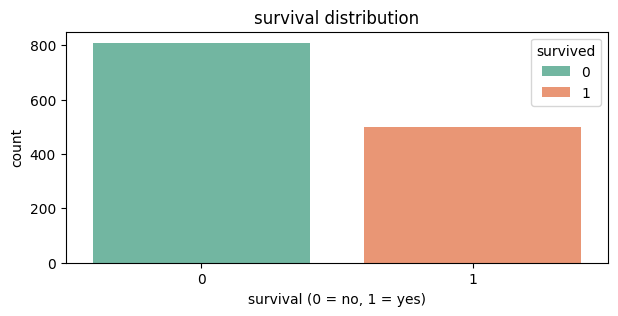

In [25]:
#checking class distribution again (same code as in task 1)
plt.figure(figsize=(7,3))
sns.countplot(data=df, x="survived", hue="survived", palette="Set2")
plt.title("survival distribution")
plt.xlabel("survival (0 = no, 1 = yes)")
plt.ylabel("count")
plt.show()

Explanation for the following section of Code:

Before applying SMOTE we have to make sure that there are only numerical columns since it will not work otherwise.

SMOTE
I then go on to preform the SMOTE in order to balance the data. I import smote from the imblearn library and initialize it with a random state. It is then applied on the training data and it creates samples for the minority class in order to make it so that all classes have an equal number of observations (since as we saw in our summary statistics there was an imbalance is the number of passengers who died versus those who died). I then print the new class distribution to make sure that we have the same number of samples in both and as we can see the result shows that both classes now have 566 samples. This step is important for our model since because it has fewer examples of survival it might have a harder time predicting them correctly. Because of SMOTE, now our model has equal representation to learn from.

In [26]:
# drop non-numeric columns before SMOTE
X_train_scaled = X_train_scaled.select_dtypes(include=[np.number])

# making sure X_train_scaled is only numeric
print("Columns pre SMOTE:", X_train_scaled.dtypes)

print("Columns pre SMOTE:", X_train_scaled.dtypes)


Columns pre SMOTE: pclass    float64
age       float64
sibsp     float64
parch     float64
fare      float64
dtype: object
Columns pre SMOTE: pclass    float64
age       float64
sibsp     float64
parch     float64
fare      float64
dtype: object


In [27]:
from imblearn.over_sampling import SMOTE

# using SMOTE
smote = SMOTE(random_state=42)

# using it only on training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# printing new class distribution
print("Class distribution after SMOTE balancing:")
print(y_train_balanced.value_counts())


Class distribution after SMOTE balancing:
survived
0    566
1    566
Name: count, dtype: int64


Explanation for the following section of Code:

Next, I am using the same code as before since I want to see the new visualization of the data distribution that is now balanced. Afterwards, I am just printing information about the training, validation and test sets to further confirm that it is now balanced. From this, we can see that the model is successfully using SMOTE and its making the correct transorfmations.

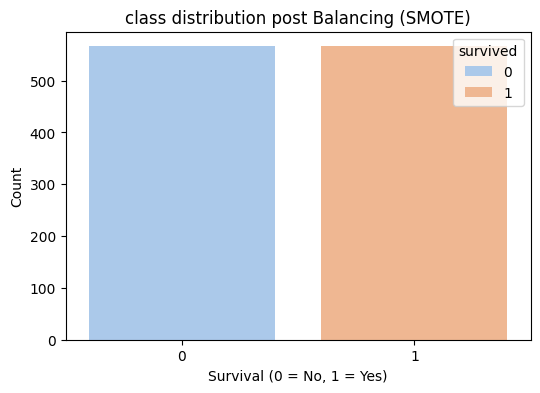

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_balanced, palette="pastel", hue=y_train_balanced)
plt.title("class distribution post Balancing (SMOTE)")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [29]:
#confirming that the dataset is ready
print("new training set size:", X_train_balanced.shape)
print("new validation set size:", X_val_scaled.shape)
print("new test set size:", X_test_scaled.shape)


new training set size: (1132, 5)
new validation set size: (196, 7)
new test set size: (197, 7)


TASK 7

Feature Selection



Explanation for the following section of Code:

In the following code I am using L1 feature selection. I decided to use it because this technique automatically only the most important features by shrinking the coefficients of the less useful features to 0. I use the SelectFromModel to apply Lasso regression with the penalty of l1. I used the "liblinear" since it is supposed to be better suited for smaller datasets and supports the technique im using of l1. The model is then trained on the balanced data. Then, "lasso_selector.get_support()" is returning a boolean mask that shows which features were selected so its basically filtering out features that are not relevant. Then, we are just keeping only those selected features in the dataset. Afterwards, I just  converted selected feature into a numpy array and then back into a data frame. I did this since it I kept having issues with it not being compatible with SelectFromModel, so this way the scikit-Learn models that work well with numpy are efficient while not losing the column names which would end up making the interpretation harder. 

The results of this show that the 5 most important features are passenger class, age, number of siblings/spouse, number of parents/children and fare. 

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_balanced.columns)

# L1 selection
lasso_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))

# selector is on training data
lasso_selector.fit(X_train_balanced, y_train_balanced)

# getting the selected features
selected_features_lasso = X_train_balanced.columns[lasso_selector.get_support()]
print("selected features after L1:", list(selected_features_lasso))

X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train_balanced.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_balanced.columns)

# keeping only selected features
X_train_balanced = X_train_balanced[selected_features_lasso]
X_val_scaled = X_val_scaled[selected_features_lasso]
X_test_scaled = X_test_scaled[selected_features_lasso]

# converting to NumPy before transformation
X_train_final = lasso_selector.transform(X_train_balanced)
X_val_final = lasso_selector.transform(X_val_scaled)
X_test_final = lasso_selector.transform(X_test_scaled)

# Converting back to DataFrame to retain feature names
X_train_final = pd.DataFrame(X_train_final, columns=selected_features_lasso)
X_val_final = pd.DataFrame(X_val_final, columns=selected_features_lasso)
X_test_final = pd.DataFrame(X_test_final, columns=selected_features_lasso)

print("\nfinal transformed X_train shape:", X_train_final.shape)
print("final transformed X_val shape:", X_val_final.shape)
print("final transformed X_test shape:", X_test_final.shape)


selected features after L1: ['pclass', 'age', 'sibsp', 'parch', 'fare']

final transformed X_train shape: (1132, 5)
final transformed X_val shape: (196, 5)
final transformed X_test shape: (197, 5)


Explanation for the following section of Code:

For the first part I used variance threshold in order to remove any low variance features. We do this because features that do not contain a lot of variance accross different samples are probably not going to be very useful. If the variance is close to 0  it implies that its not very helpful in distinguishing between classes (i chose a threshold of 0.01 so features with less than 1% of variance will be dropped). As shown in the results, the only features that passed the test of variance were class, age, number of siblings/spouse, number of parents/children and fare which were the same ones that passed the L1 test. This reenforces that these are the most important features for our model. 

For the second part we used a correlation based feature selection. We did this in order to delete any features that may be highly correlated as this can not only be redundant information for the model but can also cause multicollinearity problems. I chose 85% as my threshold meaning that any features with a correlation higher than this will be deleted. As we can see, none of the features were found to have such a high correlation meaning that they are independant of eachother and are each having their own effect. 

In [31]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)  # defined the threshold as 1%

# applying transformation
X_train_reduced = var_thresh.fit_transform(X_train_balanced)

# applying variance threshold
X_train_reduced = var_thresh.fit_transform(X_train_balanced)

# converting back to DataFrame 
X_train_reduced = pd.DataFrame(X_train_reduced, columns=X_train_balanced.columns)


selected_features = X_train_reduced.columns[var_thresh.get_support()]
print("selected features after variance thresholding:", list(selected_features))


selected features after variance thresholding: ['pclass', 'age', 'sibsp', 'parch', 'fare']


In [32]:
# Computing correlation matrix
corr_matrix = X_train_balanced.corr().abs()

# Selecting upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with high correlation
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", high_corr_features)


Highly correlated features to drop: []


TASK 8

Training a Logistic Regression Model

Explanation for the following section of Code:

The model below is being trained on X_train_reduced which is the set selected after feature selection and y_train_balanced which is the balanced target variable post SWOT. The regression is basically learning from the independant variables in the X features and using that to predict the y. The coefficients that are being printed are explaining the importance of the features (neg coefficient: decreasesd survival prob/ positive coefficient: increased chance of survival). From this we can come to some conclusions about each of our features.

Class: With a coefficient of -0.6977 we can conclude that being a part of the third class implies you have lower chances of survival
Age: With a coefficient of -0.4578, this implies that the older the passenger the lower their chance of survival
Sibsp: With a coefficient of -0.2916, we can conclude that having siblings or a spouse on board slightly decreases the chance of survival
Parch: With a coefficient of 0.1877 we can see that having a parent/child on board slightly increases the chance of survival
Fare: With a coefficient of 0.1869, we can conclude that richer passengers (those who paid more) had a higher chance of survival

The model is then making prediction on the validation and test sets. Using tools like accuracy, precesion and recall we will then be able to see how succesfull the model actually is in making these predictions. 

In [33]:
from sklearn.linear_model import LogisticRegression

# logistic regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# training model on the final selected features
log_reg.fit(X_train_reduced, y_train_balanced)

# print model coefficients (to understand feature importance)
print("Model Coefficients:")
for feature, coef in zip(selected_features_lasso, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

X_val_reduced = X_val_scaled.drop(columns=high_corr_features)
X_test_reduced = X_test_scaled.drop(columns=high_corr_features)


Model Coefficients:
pclass: -0.6977
age: -0.4578
sibsp: -0.2916
parch: 0.1877
fare: 0.1869


In [34]:
# Make predictions on the validation and test sets
y_val_pred = log_reg.predict(X_val_final)
y_test_pred = log_reg.predict(X_test_final)


Explanation for the following section of Code:

Below we have the results of the model evaluation. The accuracy score ended up being of 67% for validation and 72% for the training. This means that it is correctly predicting survival 67/100 and 72/100 times respectively. While this is not bad, it could defiently be improved (but this is what we will work on on the next assingment :)

From the Confusion Matrix we can then see that for precesion the scores were of 76% for no survival and 56% for survival. This means that there are some false positives happening since the model is missclassifying some passengers as survivers when they were not. For recall, the scores were 69% and 64% for survival and no survival. Since the recall for survival is greater for recall than precesion we can understand that the model is finding more correct survivals but at the cost of many false positives. 

Finally, the F1-score shows the balance between precision and recall. 72% for no survival and 60% for survival. This shows again that the model struggles with finding the right balance between the two as it keeps overestimating survival. 

Validation Accuracy: 0.6735
Test Accuracy: 0.7259

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       121
           1       0.56      0.64      0.60        75

    accuracy                           0.67       196
   macro avg       0.66      0.67      0.66       196
weighted avg       0.68      0.67      0.68       196



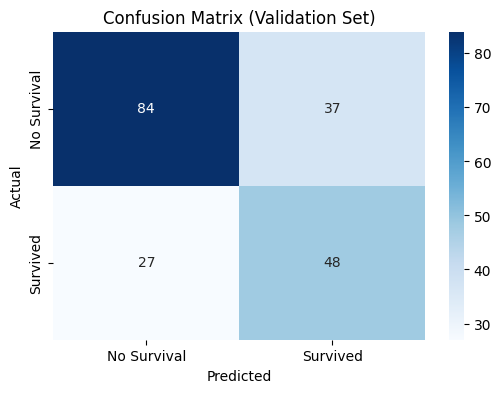

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# accuracy scores
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()
